# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)

'''
d1: a standardized measure of how far the stock is from the strike, adjusted for time and volatility.
d2: similar but accounts for the risk of volatility over time.
'''

def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

# CALL OPTION PRICES

## a. 

To plot $\Theta$, i.e., $( \partial C / \partial t)$ vs time $(t)$

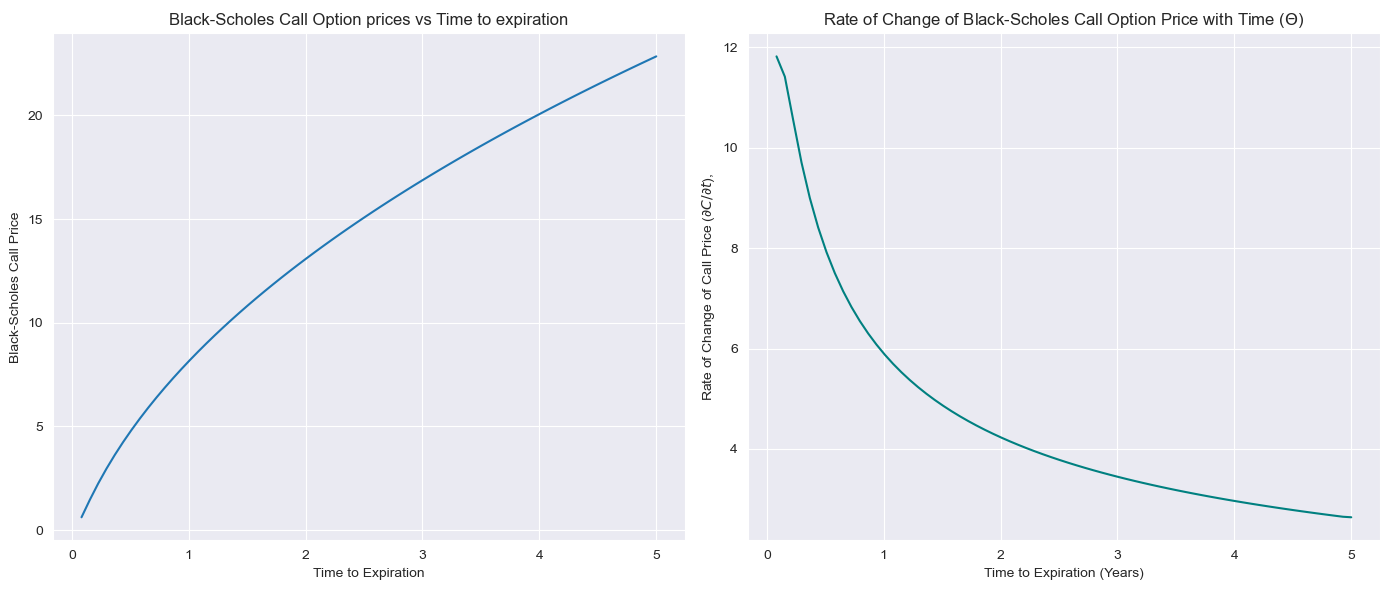

In [54]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]
dt = times[1] - times[0]
call_rate_of_change = np.gradient(call_prices, dt)

plt.figure(figsize = (14,6))
plt.subplot(1, 2, 1)
plt.title('Black-Scholes Call Option prices vs Time to expiration')
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')

plt.subplot(1, 2, 2)
plt.plot(times, call_rate_of_change, color='teal')
plt.title("Rate of Change of Black-Scholes Call Option Price with Time ($\Theta$)")
plt.xlabel("Time to Expiration (Years)")
plt.ylabel("Rate of Change of Call Price ($\partial C/\partial t$), ")
plt.grid(True)

plt.tight_layout()
plt.show()



The above plot shows how the Black-Scholes Call Option Price changes as the Time to Expiration changes.

- The call price increases with time because the more time we have to expiration, higher the chance that the stock price will exceed the strike price, thus the option becomes more valuable (time value).

- It also has a concave shape, i.e., increases a lot faster initially but then the increase slows down. There is a diminishing marginal benefit as the optionality has already been captured --> indicates a decreasing rate of change.

From the Black-Schole's equation:

As $t$ increases, 

- $d1$ and $d2$ increase and become wider because $( \sigma \sqrt{t} $) increases --> so more uncertainty.

- The cdf values increase --> indicates more chances of ending in-money.

- The discount factor $( e^{-rt} $) decreases --> present value of the strike $( K e^{-rt} $) smaller.

Therefore, the call option increases with time to expiration. But the amount of growth also slows down as the extra time adds a diminishing value due to the flattening probabilities and smaller marginal impact of discounting.

For risk-free interest (r=0), the effect of time on the call option price depends fully on the volatility, i.e., the uncertainty in the stock's movement in the future. Intially, adding more time increases the option's value as there's more chance that the price of the stock will increase and become more profitable. But as we keep on adding time, each extra bit doesn't contribute much. Therefore, the rate of change of the call price gradually slows down.

## b. 

To plot $\Delta$, i.e., $( \partial C / \partial S)$ vs Spot price $(S(0))$

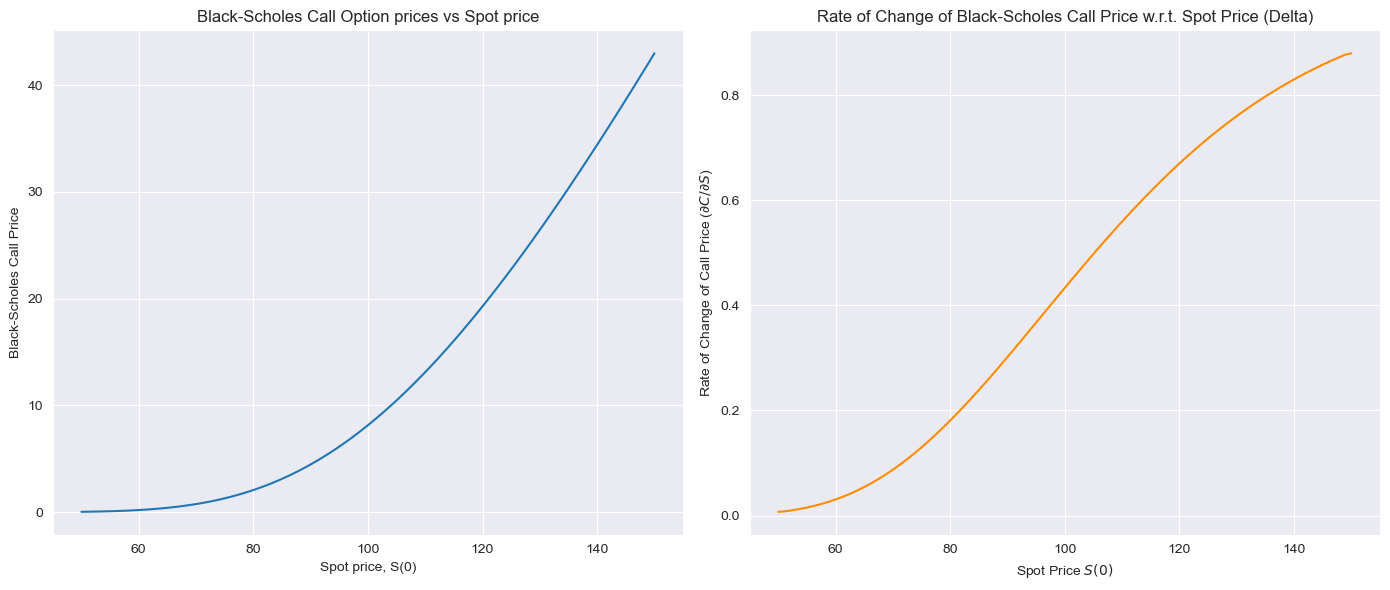

In [48]:
K = 110
sigma = 0.3
t = 1

S_values = np.linspace(50, 150, 100)
call_prices_b = [bs_call(S, K, sigma, t) for S in S_values]
dS = S_values[1] - S_values[0]
delta_values = np.gradient(call_prices_b, dS)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('Black-Scholes Call Option prices vs Spot price')
plt.plot(S_values, call_prices_b)
plt.xlabel('Spot price, S(0)')
plt.ylabel('Black-Scholes Call Price')

plt.subplot(1, 2, 2)
plt.plot(S_values, delta_values, color='darkorange')
plt.title("Rate of Change of Black-Scholes Call Price w.r.t. Spot Price (Delta)")
plt.xlabel("Spot Price $S(0)$")
plt.ylabel("Rate of Change of Call Price ($\partial C/\partial S$)")
plt.grid(True)
plt.tight_layout()
plt.show()

In the above plot for r=0, the effect comes purely from the relationship between the spot price and the probability of ending in the money.

So, when the spot price is well below the stock price, the option is less likely to be exercised. So $\Delta \approx 0$. The call price barely depends on the change in the stock price.

As the spot price increases, the chances of it exceeding the strike prices increases as well leading to more chances of the option to be exercised. So, to offset this risk, the value of $\Delta$ gets bigger rapidly. In this case, the option price is much more sensitive to changes in the stock price. When spot price $>>$ strike price, $\Delta \approx 1$.

# PUT OPTION PRICES

## c.

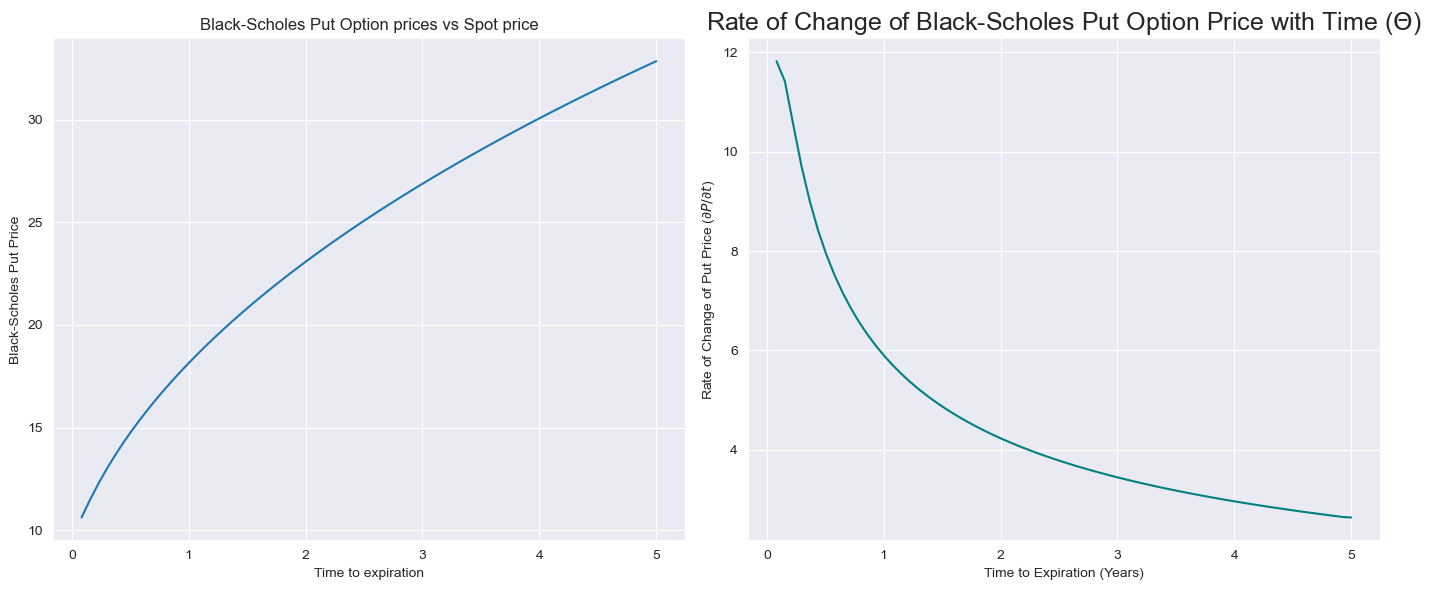

In [52]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)

put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]
dt = times[1] - times[0]
put_rate_of_change = np.gradient(put_prices, dt)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('Black-Scholes Put Option prices vs Spot price')
plt.plot(times, put_prices)
plt.xlabel('Time to expiration')
plt.ylabel('Black-Scholes Put Price')

plt.subplot(1, 2, 2)
plt.plot(times, put_rate_of_change, color='teal')
plt.title("Rate of Change of Black-Scholes Put Option Price with Time ($\Theta$)", fontsize=18)
plt.xlabel("Time to Expiration (Years)")
plt.ylabel("Rate of Change of Put Price ($\partial P/\partial t$)")
plt.grid(True)
plt.tight_layout()
plt.show()

As in the case for the call option pricing, for the put option price time sensitivity plot as well we see that it increases rapidly in the short term but becomes less sensitive to time as expiration increases. As r=0, the pattern reflects the effect of only volatility.

Both the plots look the same as we are plotting for r=0. So the call-put parity becomes:

$C-P = S_0 - K$. 

Therefore the time derivatives become: $\partial C/\partial t \approx \partial P/\partial t$.

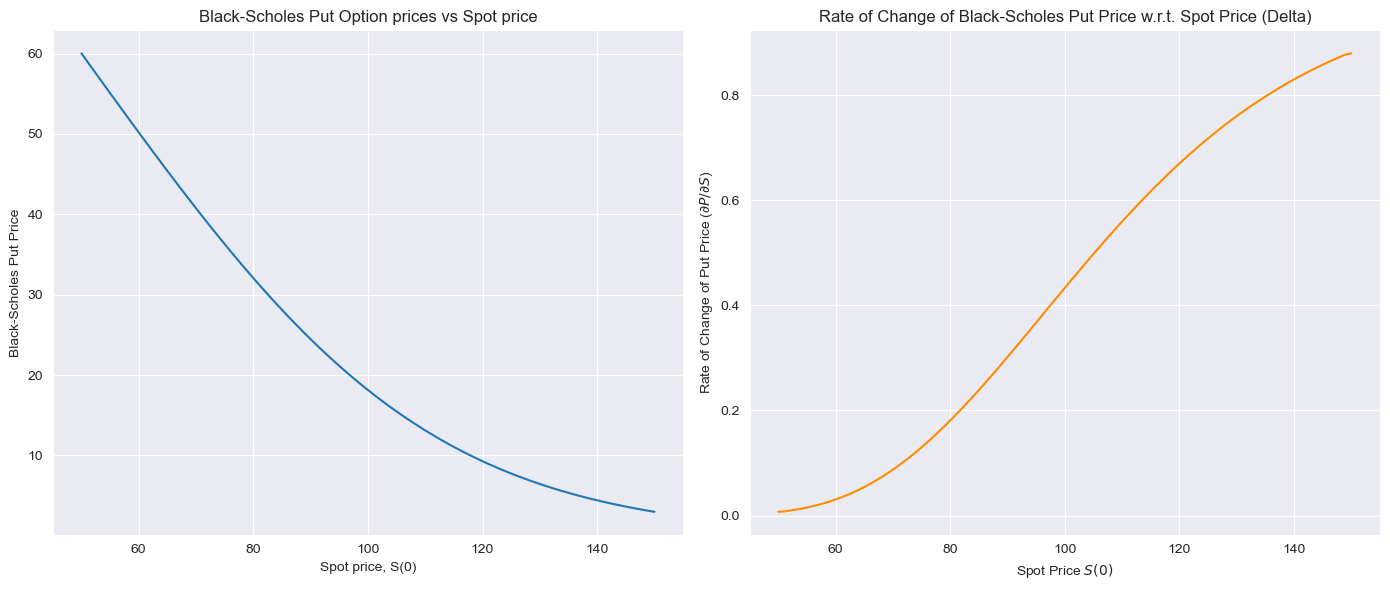

In [50]:
K = 110
sigma = 0.3
t = 1

S_values = np.linspace(50, 150, 100)
put_prices_b = [bs_put(S, K, sigma, t) for S in S_values]
dS = S_values[1] - S_values[0]
delta_values_put = np.gradient(put_prices_b, dS)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('Black-Scholes Put Option prices vs Spot price')
plt.plot(S_values, put_prices_b)
plt.xlabel('Spot price, S(0)')
plt.ylabel('Black-Scholes Put Price')

plt.subplot(1, 2, 2)
plt.plot(S_values, delta_values, color='darkorange')
plt.title("Rate of Change of Black-Scholes Put Price w.r.t. Spot Price (Delta)")
plt.xlabel("Spot Price $S(0)$")
plt.ylabel("Rate of Change of Put Price ($\partial P/\partial S$)")
plt.grid(True)
plt.tight_layout()
plt.show()

In the above plot, the nature of the plot is exactly the same as that in the call $\Delta$, but here the value of put $\Delta$ ranges from -1 to 0, whereas for call option, $\Delta$ ranges from 0 to 1. They are symmetric and indicate how option sensitivity to spot price changes evolve across different moneyness levels. 

Relation: $\Delta_P = \Delta_C -1$

# OBSERVATIONS

- Call Delta increases from 0 to 1 as the spot price rises.
- Put Delta decreases from 0 to -1 as the spot price rises.
- Theta is maximally negative near expiration, indicating accelerated time decay.
- With risk-free interest rate = 0, call and put Thetas are nearly symmetric, in line with put-call parity.
- Effect of moneyness: Delta changes sharply near the money; Theta peaks near at-the-money region.

So:

- Call Option - Time Sensitivity:
As time to maturity decreases, the call option price generally decreases, especially when the option is out-of-the-money. This reflects theta decay, which accelerates as expiration approaches. In-the-money options decay more slowly over time.

- Call Option - Spot Price Sensitivity:
The call price increases as the underlying asset price increases. The rate of increase (i.e., delta) is higher when the option is in-the-money. Near the strike price, the call price curve becomes steepest.

- Put Option - Time Sensitivity:
Put options also lose value as time passes, especially when out-of-the-money. The decay is slower for in-the-money puts. Overall, theta is negative and becomes more pronounced near expiry.

- Put Option - Spot Price Sensitivity:
The put option price decreases as the spot price increases. The price is most sensitive to spot price changes when the option is near the money, and this sensitivity decreases as the option moves further in- or out-of-the-money.

These patterns align with option pricing theory, i.e., option values depend on the probability of being in-the-money at expiry. As time passes or spot prices shift, those probabilities, and hence the option prices, change accordingly.
